In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data visualization

In [3]:
print(df.shape)

(45211, 17)


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
print(df.job.value_counts())
print("-"*40)
print(df.marital.value_counts())
print("-"*40)
print(df.education.value_counts())
print("-"*40)
print(df.default.value_counts())
print("-"*40)
print(df.housing.value_counts())
print("-"*40)
print(df.loan.value_counts())
print("-"*40)
print(df.contact.value_counts())
print("-"*40)
print(df.day.value_counts())
print("-"*40)
print(df.month.value_counts())
print("-"*40)
print(df.campaign.value_counts())
print("-"*40)
print(df.pdays.value_counts())
print("-"*40)
print(df.previous.value_counts())
print("-"*40)
print(df.poutcome.value_counts())
print("-"*40)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
yes    25130
no     20081
Name: housing, dtype: int64
----------------------------------------
no     37967
yes     7244
Name: loan, dtype: int64
----------------------------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
----------------------------------

In [6]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


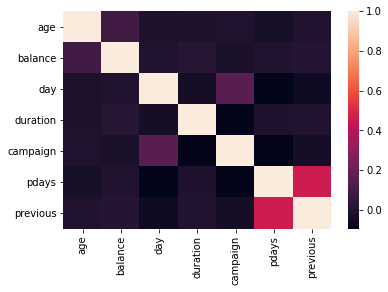

In [7]:
sns.heatmap(df.corr())

In [8]:
print(df.columns.to_list().remove)
category_cols = [
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'poutcome']
dist_cols = [
             	'age',	'balance', 'duration',	'campaign',	'pdays',	'previous'
]

<built-in method remove of list object at 0x7f98360aca48>


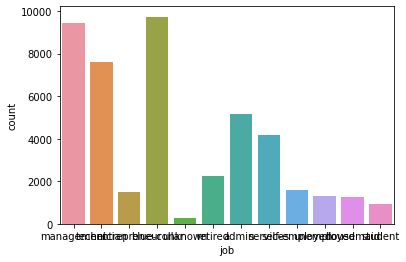

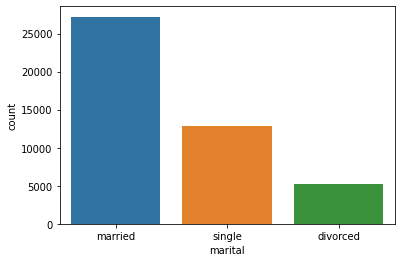

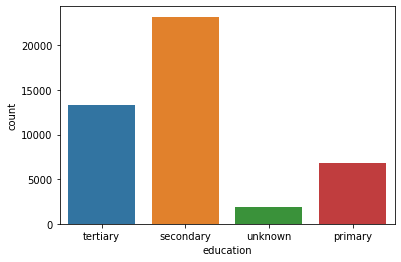

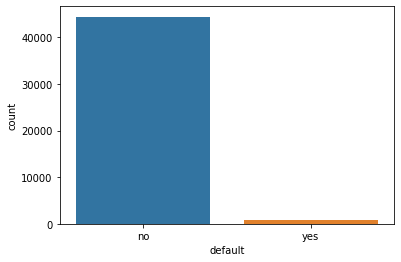

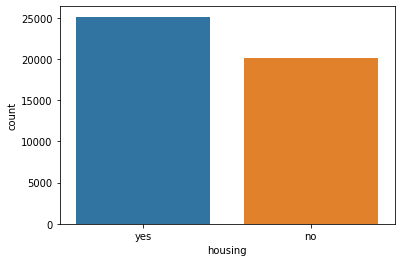

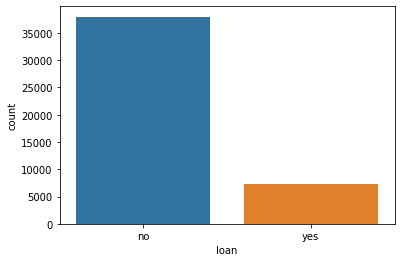

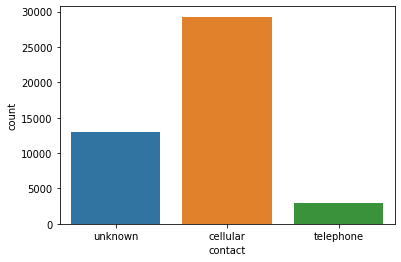

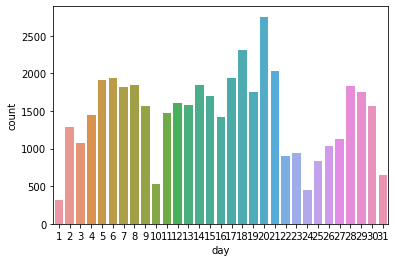

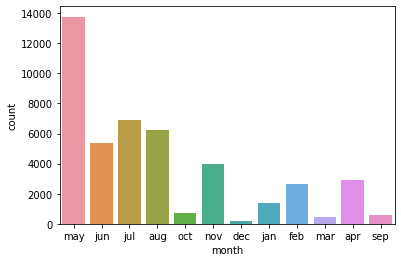

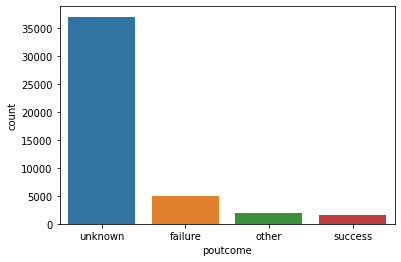

In [9]:
for col in category_cols:
  sns.countplot(df[col])
  plt.show()

#  Data preprocessing

In [21]:
def preprocess_data(df):
  Y = pd.DataFrame(df['y'])
  X = df.drop(columns = "y")
  enc = OneHotEncoder(handle_unknown='ignore')
  df_x = pd.DataFrame(enc.fit_transform(X[category_cols]).toarray())
  X = X.join(df_x)
  X = X.drop(columns = category_cols)
  for column in dist_cols:
    X[column] = (X[column] - np.min(X[column]))/(np.max(X[column]) - np.min(X[column]))
  Y = pd.DataFrame(enc.fit_transform(Y[['y']]).toarray())[1]
  return X,Y

In [22]:
X,Y = preprocess_data(df)

In [23]:
X

,age,balance,duration,campaign,pdays,previous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.519481,0.092259,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.015453,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.018707,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.198658,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.088501,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.124689,0.229158,0.064516,0.212156,0.010909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.078868,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    1.0
45207    1.0
45208    1.0
45209    0.0
45210    0.0
Name: 1, Length: 45211, dtype: float64

#  Training Data:

In [38]:
def train_lr(X,Y):
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = 62)
  clf = LogisticRegression(max_iter = 500).fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  train_conf_mat = metrics.confusion_matrix(y_train,y_train_pred)
  train_acc = metrics.accuracy_score(y_train,y_train_pred)
  print("train confusion matrix : ",train_conf_mat)
  print("train accuracy : ",train_acc)
  y_val_pred = clf.predict(X_val)
  val_conf_mat = metrics.confusion_matrix(y_val,y_val_pred)
  val_acc = metrics.accuracy_score(y_val,y_val_pred)
  print("val confusion matrix : ",val_conf_mat)
  print("val accuracy : ",val_acc)
  return clf

In [44]:
def train_rf(X,Y):
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = 62)
  clf = RandomForestClassifier(n_estimators=250).fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  train_conf_mat = metrics.confusion_matrix(y_train,y_train_pred)
  train_acc = metrics.accuracy_score(y_train,y_train_pred)
  print("train confusion matrix : ",train_conf_mat)
  print("train accuracy : ",train_acc)
  y_val_pred = clf.predict(X_val)
  val_conf_mat = metrics.confusion_matrix(y_val,y_val_pred)
  val_acc = metrics.accuracy_score(y_val,y_val_pred)
  print("val confusion matrix : ",val_conf_mat)
  print("val accuracy : ",val_acc)
  return clf

In [35]:
def train_nb(X,Y):
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = 62)
  clf = GaussianNB().fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  train_conf_mat = metrics.confusion_matrix(y_train,y_train_pred)
  train_acc = metrics.accuracy_score(y_train,y_train_pred)
  print("train confusion matrix : ",train_conf_mat)
  print("train accuracy : ",train_acc)
  y_val_pred = clf.predict(X_val)
  val_conf_mat = metrics.confusion_matrix(y_val,y_val_pred)
  val_acc = metrics.accuracy_score(y_val,y_val_pred)
  print("val confusion matrix : ",val_conf_mat)
  print("val accuracy : ",val_acc)
  return clf

In [36]:
def train_svm(X,Y):
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = 62)
  clf = SVC(kernel = "linear").fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  train_conf_mat = metrics.confusion_matrix(y_train,y_train_pred)
  train_acc = metrics.accuracy_score(y_train,y_train_pred)
  print("train confusion matrix : ",train_conf_mat)
  print("train accuracy : ",train_acc)
  y_val_pred = clf.predict(X_val)
  val_conf_mat = metrics.confusion_matrix(y_val,y_val_pred)
  val_acc = metrics.accuracy_score(y_val,y_val_pred)
  print("val confusion matrix : ",val_conf_mat)
  print("val accuracy : ",val_acc)
  return clf

In [37]:
def train_xgb(X,Y):
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.2,random_state = 62)
  clf = XGBClassifier().fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  train_conf_mat = metrics.confusion_matrix(y_train,y_train_pred)
  train_acc = metrics.accuracy_score(y_train,y_train_pred)
  print("train confusion matrix : ",train_conf_mat)
  print("train accuracy : ",train_acc)
  y_val_pred = clf.predict(X_val)
  val_conf_mat = metrics.confusion_matrix(y_val,y_val_pred)
  val_acc = metrics.accuracy_score(y_val,y_val_pred)
  print("val confusion matrix : ",val_conf_mat)
  print("val accuracy : ",val_acc)
  return clf

#  Prediction:

In [30]:
def predict(X,Y,clf):
  y_predict = clf.predict(X)
  acc = metrics.accuracy_score(Y,y_predict)
  print(acc)
  conf_mat = metrics.confusion_matrix(Y,y_predict)
  print(conf_mat)
  metrics.plot_confusion_matrix(clf,X,Y)

In [39]:
clf_lr = train_lr(X,Y)

train confusion matrix :  [[31228   723]
 [ 2800  1417]]
train accuracy :  0.9025934527759345
val confusion matrix :  [[7799  172]
 [ 737  335]]
val accuracy :  0.8994802609753401


In [45]:
clf_rf = train_rf(X,Y)

train confusion matrix :  [[31951     0]
 [    0  4217]]
train accuracy :  1.0
val confusion matrix :  [[7771  200]
 [ 668  404]]
val accuracy :  0.9040141545947141


In [41]:
clf_nb = train_nb(X,Y)

train confusion matrix :  [[27583  4368]
 [ 1834  2383]]
train accuracy :  0.8285224507852245
val confusion matrix :  [[6869 1102]
 [ 490  582]]
val accuracy :  0.8239522282428398


In [42]:
clf_svm = train_svm(X,Y)

train confusion matrix :  [[31521   430]
 [ 3422   795]]
train accuracy :  0.8934970139349702
val confusion matrix :  [[7868  103]
 [ 889  183]]
val accuracy :  0.8903018909653876


In [43]:
clf_xgb = train_xgb(X,Y)

train confusion matrix :  [[31244   707]
 [ 2564  1653]]
train accuracy :  0.9095609378456094
val confusion matrix :  [[7786  185]
 [ 688  384]]
val accuracy :  0.9034612407386929
